# Pre-procesamiento

El documento original es un documento de MS Excel (.xlsx) compuesto cuyas celdas son tratadas principalmente como texto en Español. Para un correcto procesamiento es necesari lo siguiente:

*1. Cambiar todas las comas (,) por punto y comas (;):* Esto para que no interfiera con la conversión a UTF-8 .csv y el procesamiento realizado en las librerías de python, centradas principalmente en procesar datos en inglés.

*2. Cambiar las letras tildadas:* Se cambia cada vocal tildada por la vocal sin tilde para que, nuevamente, no interfieran con el procesamiento posterior de las librerías de python y para conservar la interpretabilidad. 

*3. Borrar la cabecera:* La cabecera incluye el escudo de la Gobernación de Antioquia y el título de la tabla. Esta file puede interfiere con el procesamiento en AWS y con las librerías, por lo que se optó por suprimirla.

*4. Convertir a UTF-8 .csv:* Esto para facilitar el procesamiento por parte de las librerías de python.

# Procesamiento de duplicados

Con el fin de optimizar el tiempo de procesamiento y tras un análisis del dataset se tomó la decisión de identificar y depurar los registros cuya cédula está duplicada. Esto implica tener en cuenta que, si bien se pretende conservar el registro más reciente de cada cédula, este registro puede tener información faltante que registros previos de la misma cédula pueden llegar a tener. A continuación, se puede apreciar un ejemplo de dos registros que comparten cédula, sin embargo el registro más reciente tiene menos información que el anterior:

| Campo                                                       | Duplicado 1                          | Duplicado 2              | Duplicado 3                          |
| :---------------------------------------------------------- | :----------------------------------- | :----------------------- | :----------------------------------- |
| ObjectID                                                    | 7974                                 | 42123                    | 46966                                |
| Fecha de la encuesta                                        | 26/07/2024 17:00                     | 5/08/2024 17:00          | 11/09/2024 17:00                     |
| Nombres y apellidos del encuestador                         | GREGORY SANDOVAL URIBE               | CAROL MARTINEZ           | CAROL MARTINEZ                       |
| Tipo de documento del encuestador                           | Cedula de ciudadania                 | Cedula de ciudadania     | Cedula de ciudadania                 |
| Numero de documento del encuestador                         | 1036190564                           | 1047966705               | 1047966705                           |
| Subregion (PcD)                                             | Oriente                              | Oriente                  | Oriente                              |
| Municipio de residencia (PcD)                               | Nariño                               | Nariño                   | Nariño                               |
| Zona de residencia (PcD)                                    | Rural                                | Rural                    | Rural                                |
| Nombre del Barrio o Vereda (PcD)                            | VEREDA EL LLANO                      | EL LLANO                 | EL LLANO                             |
| Direccion de la residencia (PcD)                            | EL LLANO                             | VEREDA EL LLANO          | EL LLANO                             |
| Telefono (PcD)                                              | 3145203259                           | 3225239605               | 3145203259                           |
| Primer nombre de la PcD                                     | HERNAN                               | HERNAN                   | HERNAN                               |
| Segundo nombre de la PcD                                    |                                      |                          |                                      |
| Primer apellido de la PcD                                   | GIRALDO                              | GIRALDO                  | GIRALDO                              |
| Segundo apellido de la PcD                                  | MARTINEZ                             | MARTINEZ                 | MARTINEZC                            |
| Tipo de documento (PcD)                                     | Cedula                               | Cedula                   | Cedula                               |
| Numero de documento (PcD)                                   | 98677872                             | 98677872                 | 98677872                             |
| Correo (PcD)                                                | saludpublica@narino-antioquia.gov.co |                          | saludpublica@narino-antioquia.gov.co |
| Fecha de nacimiento (PcD)                                   | 27/08/1984 17:00                     | 27/08/1984 17:00         | 27/08/1984 17:00                     |
| Edad de la PcD                                              | 39                                   | 39                       | 40                                   |
| Sexo (PcD)                                                  | Hombre                               | Hombre                   | Hombre                               |
| Estado civil (PcD)                                          | Soltero(a)                           | Soltero(a)               | Soltero(a)                           |
| Nivel de escolaridad (PcD)                                  | Secundaria incompleta                | Ninguno                  | Secundaria incompleta                |
| Tipo de Vivienda                                            | Familiar                             | Familiar                 | Familiar                             |
| Estrato socioeconomico (PcD)                                | Estrato 1                            | Estrato 1                | Estrato 1                            |
| Actividad Laboral                                           | Empleado                             | No puede trabajar        | No puede trabajar                    |
| Describa su emprendimiento                                  |                                      |                          |                                      |
| Grupo poblacional en que se reconoce (PdC)                  | Ninguno                              | Ninguno                  | Ninguno                              |
| Etnia - Cabildo al que pertenece (PcD)                      |                                      |                          |                                      |
| Pertenece a Comunidad LGTBIQ+                               | No                                   | No                       | No                                   |
| Pertenece a Poblacion Victima (RUV)                         | Si                                   | Si                       | No                                   |
| Hecho Victimizante                                          | Desplazamiento_forzado               | Desplazamiento_forzado   |                                      |
| Pertenece a poblacion Campesina                             | Si                                   | Si                       | Si                                   |
| Pertenece a poblacion Migrante                              | No                                   | No                       | No                                   |
| Tiene afiliacion al sistema de salud                        | Si                                   | Si                       | Si                                   |
| Tipo de afiliacion regimen de salud                         | Regimen subsidiado                   | Regimen subsidiado       | Regimen subsidiado                   |
| EPS                                                         | Savia Salud                          | Savia Salud              | Savia Salud                          |
| Cual otra EPS                                               |                                      |                          |                                      |
| Recibe Pension                                              | No                                   | No                       | No                                   |
| Cual es el fondo de pensiones                               |                                      |                          |                                      |
| Tiene Certificado de Discapacidad                           | No                                   | No                       | Si                                   |
| Tipo de discapacidad                                        | Psicosocial                          | Intelectual              | Multiple                             |
| Tipo de discapacidad multiple                               |                                      |                          | Fisica;Intelectual                   |
| ¿Utiliza la Lengua de Señas Colombiana (LSC)?               |                                      |                          |                                      |
| Total de discapacidades seleccionadas                       |                                      |                          | 2                                    |
| Describa aqui el diagnostico medico                         | EPILEPSIA                            | EPILEPSIA                | MULTIPLE                             |
| Principalmente su discapacidad es consecuencia de           | Por enfermedad                       | Por enfermedad           | De nacimiento                        |
| Elementos de apoyo o ayudas tecnicas que utiliza            | Ninguno                              | Ninguno                  | Ninguno                              |
| ¿Ha accedido a programas de rehabilitacion?                 | No_recibe_rehabilitacion             | No_recibe_rehabilitacion | No_recibe_rehabilitacion             |
| ¿Que hace en su tiempo libre?                               | DESCANSAR                            | COMPARTIR EN FAMILIA     | COMPARTE EN FAMILIA                  |
| ¿En que tipo de actividades le gustaria participar?         | Ninguna                              | Familia;EduNoformal      | Productivas;Familia;EduNoformal      |
| Tiene cuidador                                              | No                                   | No                       | No                                   |
| Nombres y apellidos del cuidador                            |                                      |                          |                                      |
| Documento del Cuidador                                      |                                      |                          |                                      |
| Parentezco del cuidador con la PcD                          |                                      |                          |                                      |
| Telefono del cuidador                                       |                                      |                          |                                      |
| Como cuidador ¿ha visto afectada su salud?                  |                                      |                          |                                      |
| ¿De que manera?                                             |                                      |                          |                                      |
| ¿Ha visto limitadas sus posibilidades de ingreso economico? |                                      |                          |                                      |
| ¿Por que?                                                   |                                      |                          |                                      |
| ¿Ha recibido capacitacion como cuidador?                    |                                      |                          |                                      |
| Actividad Laboral del Cuidador                              |                                      |                          |                                      |
| Describa su emprendimiento                                  |                                      |                          |                                      |
| Hace parte del comite municipal de Discapacidad             | No                                   | No                       | No                                   |
| Hace parte de alguna Organizacion/Asociacion de PcD         | No                                   | No                       | No                                   |
| Como se llama la Organizacion/Asociacion                    |                                      |                          |                                      |
| Programas sociales en los que participa                     | Ninguno                              | Ninguno                  | Ninguno                              |
| Cual o Cuales programas sociales                            |                                      |                          |                                      |
| A que espacios de participacion pertenece                   | Ninguno                              | Ninguno                  | Ninguno                              |
| Consentimiento Informado                                    | autorizo                             | autorizo                 | autorizo                             |
| CreationDate                                                | 07/26/2024 21:10:28.542              | 08/05/2024 20:09:38.130  | 09/11/2024 15:57:51.910              |
| EditDate                                                    | 07/26/2024 21:10:28.542              | 08/05/2024 20:09:38.130  | 09/11/2024 15:57:51.910              |
| Autorizacion de Comunicacion                                | autorizo                             | autorizo                 | autorizo                             |
| x                                                           | -75.1767315                          | 0                        | -75.17657245                         |
| y                                                           | 5.6100085                            | 0                        | 5.609893519                          |
|                                                             |                                      |                          |                                      |


Es por casos como este que se hace necesario la implementación de un merge (entendiéndolo como a la acción ejecutada en herrramientas de control de versiones como [GitHub](https://docs.github.com/en/repositories/configuring-branches-and-merges-in-your-repository/configuring-pull-request-merges/about-merge-methods-on-github)); el resultado es el registro más reciente, con su object_id original, complementando con información otorgada en el registro anterior aquellos campos que estaban originalmente vacíos.

| Campo                                                       | Duplicado 1                          | Duplicado 2              | Duplicado 3                          | Registro final                       |
| :---------------------------------------------------------- | :----------------------------------- | :----------------------- | :----------------------------------- | :----------------------------------- |
| ObjectID                                                    | 7974                                 | 42123                    | 46966                                | 46966                                |
| Fecha de la encuesta                                        | 26/07/2024 17:00                     | 5/08/2024 17:00          | 11/09/2024 17:00                     | 11/09/2024 17:00                     |
| Nombres y apellidos del encuestador                         | GREGORY SANDOVAL URIBE               | CAROL MARTINEZ           | CAROL MARTINEZ                       | CAROL MARTINEZ                       |
| Tipo de documento del encuestador                           | Cedula de ciudadania                 | Cedula de ciudadania     | Cedula de ciudadania                 | Cedula de ciudadania                 |
| Numero de documento del encuestador                         | 1036190564                           | 1047966705               | 1047966705                           | 1047966705                           |
| Subregion (PcD)                                             | Oriente                              | Oriente                  | Oriente                              | Oriente                              |
| Municipio de residencia (PcD)                               | Nariño                               | Nariño                   | Nariño                               | Nariño                               |
| Zona de residencia (PcD)                                    | Rural                                | Rural                    | Rural                                | Rural                                |
| Nombre del Barrio o Vereda (PcD)                            | VEREDA EL LLANO                      | EL LLANO                 | EL LLANO                             | EL LLANO                             |
| Direccion de la residencia (PcD)                            | EL LLANO                             | VEREDA EL LLANO          | EL LLANO                             | EL LLANO                             |
| Telefono (PcD)                                              | 3145203259                           | 3225239605               | 3145203259                           | 3145203259                           |
| Primer nombre de la PcD                                     | HERNAN                               | HERNAN                   | HERNAN                               | HERNAN                               |
| Segundo nombre de la PcD                                    |                                      |                          |                                      |                                      |
| Primer apellido de la PcD                                   | GIRALDO                              | GIRALDO                  | GIRALDO                              | GIRALDO                              |
| Segundo apellido de la PcD                                  | MARTINEZ                             | MARTINEZ                 | MARTINEZC                            | MARTINEZC                            |
| Tipo de documento (PcD)                                     | Cedula                               | Cedula                   | Cedula                               | Cedula                               |
| Numero de documento (PcD)                                   | 98677872                             | 98677872                 | 98677872                             | 98677872                             |
| Correo (PcD)                                                | saludpublica@narino-antioquia.gov.co |                          | saludpublica@narino-antioquia.gov.co | saludpublica@narino-antioquia.gov.co |
| Fecha de nacimiento (PcD)                                   | 27/08/1984 17:00                     | 27/08/1984 17:00         | 27/08/1984 17:00                     | 27/08/1984 17:00                     |
| Edad de la PcD                                              | 39                                   | 39                       | 40                                   | 40                                   |
| Sexo (PcD)                                                  | Hombre                               | Hombre                   | Hombre                               | Hombre                               |
| Estado civil (PcD)                                          | Soltero(a)                           | Soltero(a)               | Soltero(a)                           | Soltero(a)                           |
| Nivel de escolaridad (PcD)                                  | Secundaria incompleta                | Ninguno                  | Secundaria incompleta                | Secundaria incompleta                |
| Tipo de Vivienda                                            | Familiar                             | Familiar                 | Familiar                             | Familiar                             |
| Estrato socioeconomico (PcD)                                | Estrato 1                            | Estrato 1                | Estrato 1                            | Estrato 1                            |
| Actividad Laboral                                           | Empleado                             | No puede trabajar        | No puede trabajar                    | No puede trabajar                    |
| Describa su emprendimiento                                  |                                      |                          |                                      |                                      |
| Grupo poblacional en que se reconoce (PdC)                  | Ninguno                              | Ninguno                  | Ninguno                              | Ninguno                              |
| Etnia - Cabildo al que pertenece (PcD)                      |                                      |                          |                                      |                                      |
| Pertenece a Comunidad LGTBIQ+                               | No                                   | No                       | No                                   | No                                   |
| Pertenece a Poblacion Victima (RUV)                         | Si                                   | Si                       | No                                   | No                                   |
| Hecho Victimizante                                          | Desplazamiento_forzado               | Desplazamiento_forzado   |                                      | Desplazamiento_forzado               |
| Pertenece a poblacion Campesina                             | Si                                   | Si                       | Si                                   | Si                                   |
| Pertenece a poblacion Migrante                              | No                                   | No                       | No                                   | No                                   |
| Tiene afiliacion al sistema de salud                        | Si                                   | Si                       | Si                                   | Si                                   |
| Tipo de afiliacion regimen de salud                         | Regimen subsidiado                   | Regimen subsidiado       | Regimen subsidiado                   | Regimen subsidiado                   |
| EPS                                                         | Savia Salud                          | Savia Salud              | Savia Salud                          | Savia Salud                          |
| Cual otra EPS                                               |                                      |                          |                                      |                                      |
| Recibe Pension                                              | No                                   | No                       | No                                   | No                                   |
| Cual es el fondo de pensiones                               |                                      |                          |                                      |                                      |
| Tiene Certificado de Discapacidad                           | No                                   | No                       | Si                                   | Si                                   |
| Tipo de discapacidad                                        | Psicosocial                          | Intelectual              | Multiple                             | Multiple                             |
| Tipo de discapacidad multiple                               |                                      |                          | Fisica;Intelectual                   | Fisica;Intelectual                   |
| ¿Utiliza la Lengua de Señas Colombiana (LSC)?               |                                      |                          |                                      |                                      |
| Total de discapacidades seleccionadas                       |                                      |                          | 2                                    | 2                                    |
| Describa aqui el diagnostico medico                         | EPILEPSIA                            | EPILEPSIA                | MULTIPLE                             | MULTIPLE                             |
| Principalmente su discapacidad es consecuencia de           | Por enfermedad                       | Por enfermedad           | De nacimiento                        | De nacimiento                        |
| Elementos de apoyo o ayudas tecnicas que utiliza            | Ninguno                              | Ninguno                  | Ninguno                              | Ninguno                              |
| ¿Ha accedido a programas de rehabilitacion?                 | No_recibe_rehabilitacion             | No_recibe_rehabilitacion | No_recibe_rehabilitacion             | No_recibe_rehabilitacion             |
| ¿Que hace en su tiempo libre?                               | DESCANSAR                            | COMPARTIR EN FAMILIA     | COMPARTE EN FAMILIA                  | COMPARTE EN FAMILIA                  |
| ¿En que tipo de actividades le gustaria participar?         | Ninguna                              | Familia;EduNoformal      | Productivas;Familia;EduNoformal      | Productivas;Familia;EduNoformal      |
| Tiene cuidador                                              | No                                   | No                       | No                                   | No                                   |
| Nombres y apellidos del cuidador                            |                                      |                          |                                      |                                      |
| Documento del Cuidador                                      |                                      |                          |                                      |                                      |
| Parentezco del cuidador con la PcD                          |                                      |                          |                                      |                                      |
| Telefono del cuidador                                       |                                      |                          |                                      |                                      |
| Como cuidador ¿ha visto afectada su salud?                  |                                      |                          |                                      |                                      |
| ¿De que manera?                                             |                                      |                          |                                      |                                      |
| ¿Ha visto limitadas sus posibilidades de ingreso economico? |                                      |                          |                                      |                                      |
| ¿Por que?                                                   |                                      |                          |                                      |                                      |
| ¿Ha recibido capacitacion como cuidador?                    |                                      |                          |                                      |                                      |
| Actividad Laboral del Cuidador                              |                                      |                          |                                      |                                      |
| Describa su emprendimiento                                  |                                      |                          |                                      |                                      |
| Hace parte del comite municipal de Discapacidad             | No                                   | No                       | No                                   | No                                   |
| Hace parte de alguna Organizacion/Asociacion de PcD         | No                                   | No                       | No                                   | No                                   |
| Como se llama la Organizacion/Asociacion                    |                                      |                          |                                      |                                      |
| Programas sociales en los que participa                     | Ninguno                              | Ninguno                  | Ninguno                              | Ninguno                              |
| Cual o Cuales programas sociales                            |                                      |                          |                                      |                                      |
| A que espacios de participacion pertenece                   | Ninguno                              | Ninguno                  | Ninguno                              | Ninguno                              |
| Consentimiento Informado                                    | autorizo                             | autorizo                 | autorizo                             | autorizo                             |
| CreationDate                                                | 07/26/2024 21:10:28.542              | 08/05/2024 20:09:38.130  | 09/11/2024 15:57:51.910              | 57:51.9                              |
| EditDate                                                    | 07/26/2024 21:10:28.542              | 08/05/2024 20:09:38.130  | 09/11/2024 15:57:51.910              | 57:51.9                              |
| Autorizacion de Comunicacion                                | autorizo                             | autorizo                 | autorizo                             | autorizo                             |
| x                                                           | -75.1767315                          | 0                        | -75.17657245                         | -7.517.657.245                       |
| y                                                           | 5.6100085                            | 0                        | 5.609893519                          | 5.609.893.519                        |
|                                                             |                                      |                          |                                      |                                      |



Como se puede apreciar, el campo de `Hecho victimizante`, relevante según el stakeholder, se obtuvo del registro obtenido en la primera encuesta.

Para el correcto procesamiento posterior al tratamiento y conversión del archivo original de acuerdo a los pre-requisitos, los pasos que se siguieron para obtener un nuevo archivo limpio y sin duplicados fueron los siguientes:

## Detección de duplicados

Como paso inicial se creó el método `find_duplicate_cedulas` en el archivo `encontrar_cedulas_duplicadas.py` para identificarlas y generar otro .csv con los duplicados llamado `listado_cedulas_duplicadas_<timestamp>`; este .csv no será solo usado para debugging, sino también para tener trazabilidad y un registro de las cédulas que en pasos posteriores serán eliminadas.

In [1]:
from cedulas_duplicadas import find_duplicate_cedulas

file_path = "../pcd_1211.csv"  # Reemplazar con el path del archivo
duplicates, duplicate_records, output_file = find_duplicate_cedulas(file_path)
    
print("\nDuplicado encontrados:")
if len(duplicates) > 0:
    print(duplicates)
    print(f"\nNúmero de registros duplicados: {len(duplicate_records)}")
else:
    print("No se encontraron duplicados")
    
print(f"\nTotal de registros procesados: {len(duplicate_records)}")


Los registros duplicados han sido guardados en: listado_cedulas_duplicadas_20241118_220316.csv

Duplicado encontrados:
extracted_cedula
43480068      5
1079290153    5
43649085      4
1037484900    4
1039696898    3
             ..
21430683      2
21426312      2
1032097716    2
1021938264    2
1015216346    2
Name: count, Length: 1051, dtype: int64

Número de registros duplicados: 2166

Total de registros procesados: 2166


Durante la creación de este método se percibió un gran número de registros con cédula "0", pertenecientes a diferentes personas sin identificación:

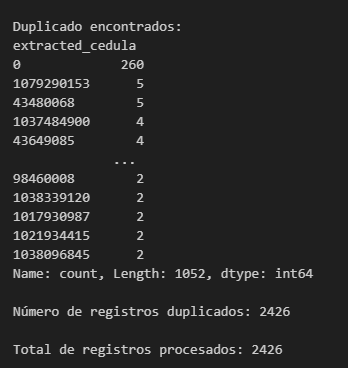

Con el fin de conservar la información de las personas sin identificación, los registros cuya cédula de ciudadanía es 0 serán omitidos por parte del detector de duplicados.

## "Merge" de datos actualizados 

Tomando el DataFrame de Panda retornado en el método anterior que contiene el listado de objetos que comparten cédula, se identifica la fila más reciente que contenga dicho número de cédula, se identifican los campos vacíos que tengan y finalmente se llenarán con información encontrada de esa columna en registros previos de la misma cédula, dándole prioridad a la información más actualizada.

La función imprime los campos faltantes de la fila antes y después de pasar por el método.

In [2]:
from merge_cedulas import fill_missing_info

filled_duplicate_records = fill_missing_info(duplicate_records, "Fecha de la encuesta")

# Display the filled records
print("\nFilled records:")
print(filled_duplicate_records)


Cédula: 1000314409

c:\Users\Lenovo\OneDrive\Escritorio\p_final_repo\Proyecto Integrador\prep-data\merge_cedulas.py:69: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  duplicate_records[date_column] = pd.to_datetime(duplicate_records[date_column], errors='coerce')



                                              Before Filling After Filling
Correo (PcD)                                             NaN           NaN
Describa su emprendimiento                               NaN           NaN
Etnia - Cabildo al que pertenece (PcD)                   NaN           NaN
Cual otra EPS                                            NaN   SAVIA SALUD
Cual es el fondo de pensiones                            NaN           NaN
Tipo de discapacidad multiple                            NaN           NaN
¿Utiliza la Lengua de Señas Colombiana (LSC)?            NaN           NaN
Total de discapacidades seleccionadas                    NaN           NaN
Describa su emprendimiento.1                             NaN           NaN
Como se llama la Organizacion/Asociacion                 NaN           NaN
Cual o Cuales programas sociales                         NaN           NaN

Cédula: 1000397676
                                              Before Filling  \
Correo (PcD)   

## Generación de un nuevo .csv 

Una vez identificados los registros duplicados y complementando el registro más reciente, se genera un nuevo archivo .csv (de nuevo, en formato UTF-8) sin duplicados llaado `clean_pcd_data.csv`.

In [3]:
from nuevo_excel import create_clean_csv

create_clean_csv(file_path, filled_duplicate_records, output_filename="clean_pcd_data.csv")

Datos limpiados guardados en clean_pcd_data.csv


## Notas - Mejoras cotinuas:

- Interfaz para subir el dataset original y descargar los generados (duplicados detectados y nuevo dataset limpio).
- Automatización de los pre-requisitos.